In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException 
from selenium.common.exceptions import TimeoutException
import time
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
driver = webdriver.Firefox()
#last month
driver.get("https://inspections.myhealthdepartment.com/sacramento")

wait = WebDriverWait(driver, 5)

date_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#filterdate')))
date_button.click()

for i in range(10):
    prev_button = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[4]/div[2]/div[1]/table/thead/tr[1]/th[1]')))
    prev_button.click()

begin_date = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[4]/div[2]/div[1]/table/tbody/tr[1]/td[4]")))
begin_date.click()

for i in range(8):
    next_button = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[4]/div[3]/div[1]/table/thead/tr[1]/th[3]')))
    next_button.click()

end_date = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[4]/div[3]/div[1]/table/tbody/tr[6]/td[1]")))
end_date.click()

apply = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[4]/div[4]/button[2]")))
apply.click()

while True:
    try:
        load_more_button = wait.until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div[9]/div/button')))
        load_more_button.click()
        time.sleep(1)
    except TimeoutException:
        print('Timeout Exception, Stopping')
        break

view_buttons = driver.find_elements(By.XPATH, '//a[contains(text(), "View")]')

links = [button.get_attribute('href') for button in view_buttons]

driver.quit()

Timeout Exception, Stopping


In [124]:
import pickle

with open("Data/Health2.pkl", "ab") as f:
    pickle.dump(links, f)

In [87]:
import pickle
with open("Data/Health.pkl", "rb") as f:
    links = pickle.load(f)
len(links)

2268

In [3]:
import json

with open("Data/combined_results.json", 'r') as f:
    health_codes = json.load(f)

with open("Data/yelp_cleaned.json", 'r') as f:
    yelp_reviews = json.load(f)

In [8]:
health_codes
columns = ["name", "address", "health codes", "date", "url"]

df_health = pd.DataFrame(health_codes, columns=columns)

In [13]:
df_health

df_health["key"] = df_health.apply(lambda row: row['address'].split()[0][:4] + "-" + row['name'][:3].lower(), axis=1)

In [15]:
df_health.to_csv("Data/healthdf.csv")

In [22]:
yelp_reviews

{'4701-tha': {'alias': 'thai-the-house-of-authentic-ingredients-sacramento',
  'name': 'THAI - The House Of Authentic Ingredients',
  'review_count': 571,
  'categories': ['Thai', 'Bars'],
  'display_address': ['4701 H St', 'Sacramento, CA 95819'],
  'addy_one': '4701 H St',
  'addy_two': None,
  'addy_three': None,
  'city': 'Sacramento',
  'zip_code': '95819',
  'phone': '+19169429008'},
 '4601-vib': {'alias': 'vibe-health-bar-sacramento-2',
  'name': 'Vibe Health Bar',
  'review_count': 322,
  'categories': ['Juice Bars & Smoothies', 'Wraps', 'Sandwiches'],
  'display_address': ['4601 H St', 'Sacramento, CA 95819'],
  'addy_one': '4601 H St',
  'addy_two': '',
  'addy_three': '',
  'city': 'Sacramento',
  'zip_code': '95819',
  'phone': '+19169705102'},
 '160-ber': {'alias': 'bertha-henschel-park-sacramento',
  'name': 'Bertha Henschel Park',
  'review_count': 17,
  'categories': ['Parks', 'Playgrounds'],
  'display_address': ['160 45th St', 'Sacramento, CA 95819'],
  'addy_one': '1

In [25]:
key_list = []
for key in yelp_reviews.keys():
    key_list.append(key)

In [28]:
yelp_reviews[key_list[0]]
key_list[0]

'4701-tha'

In [31]:
data_list = [{'key': key, **value} for key, value in yelp_reviews.items()]

df_yelp = pd.DataFrame(data_list)

In [36]:
df_yelp.to_csv("Data/yelpdf.csv")

In [41]:
df_health

,name,address,health codes,date,url,key
0,SHADY LADY,"1409 R St Ste 101 Sacramento, CA 95811-6672","[4, 7, 14a, 30a, 36, 43]","March 15, 2024",https://inspections.myhealthdepartment.com/sac...,1409-sha
1,SEE'S CANDIES SHOP SF 75,"3651-3 Truxel Rd Ste 3 Natomas, CA 95834",[],"March 15, 2024",https://inspections.myhealthdepartment.com/sac...,3651-see
2,HOMEGOODS,"3691 Truxel Rd Sacramento, CA 95834-3604",[],"March 15, 2024",https://inspections.myhealthdepartment.com/sac...,3691-hom
3,BREW TO GO,"2913 Auburn Blvd Sacramento, CA 95821","[14a, 15, 33, 35, 47a, 48]","March 15, 2024",https://inspections.myhealthdepartment.com/sac...,2913-bre
4,BRICKLAND BISTRO,"3301 Folsom Blvd Sacramento, CA 95816-5329",[7],"March 15, 2024",https://inspections.myhealthdepartment.com/sac...,3301-bri
...,...,...,...,...,...,...
7941,SAFEWAY FUEL CENTER #1895,"5400 Dewey Dr Fair Oaks, CA 95628-3138",[21],"March 1, 2023",https://inspections.myhealthdepartment.com/sac...,5400-saf
7942,SABA POULTRY 3,"8612 Younger Creek Dr Sacramento, CA 95828-1022","[6, 23]","March 1, 2023",https://inspections.myhealthdepartment.com/sac...,8612-sab
7943,MAKISU SUSHI,"2338 Fair Oaks Blvd Sacramento, CA 95825-4709","[23, 44e]","March 1, 2023",https://inspections.myhealthdepartment.com/sac...,2338-mak
7944,SHOGUN SUSHI,"7330 Fair Oaks Blvd Ste 10 Carmichael, CA 956...","[1b, 1c, 33, 35]","March 1, 2023",https://inspections.myhealthdepartment.com/sac...,7330-sho


In [48]:
df_health.dtypes
df_merge = df_yelp.merge(df_health, on ='key', how='inner')

In [50]:
df_merge.to_csv("Data/merged.csv")

In [58]:
df_yelp_v2 = pd.read_csv("Data/yelp_v2.csv")
df_yelp_v2.rename(columns={df_yelp_v2.columns[0]:'key'}, inplace=True)

In [63]:
df_yelp_v2.to_csv("Data/yelp_v2.csv")

In [61]:
df_merge_v2 = df_yelp_v2.merge(df_health, on='key')
df_merge_v2.to_csv("Data/merged.csv")

In [71]:
df_merge_v2[df_merge_v2['name_x'] == 'Panda Express'].head(2)

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,...,addy_two,addy_three,city,zip_code,phone,name_y,address,health codes,date,url
69,6000-pan,panda-express-sacramento-35,Panda Express,3.1,$,31,"['Chinese', 'Fast Food']",38.56124,-121.42446,"['6000 J Street', 'Space #1005C', 'Sacramento,...",...,NaN,NaN,Sacramento,95819,1.916739e+10,PANDA EXPRESS #1894,"6000 J St Sacramento, CA 95819-2605","[7, 14a, 33, 36]","January 10, 2024",https://inspections.myhealthdepartment.com/sac...
70,6000-pan,panda-express-sacramento-35,Panda Express,3.1,$,31,"['Chinese', 'Fast Food']",38.56124,-121.42446,"['6000 J Street', 'Space #1005C', 'Sacramento,...",...,NaN,NaN,Sacramento,95819,1.916739e+10,PANDA EXPRESS #1894,"6000 J St Sacramento, CA 95819-2605","[21, 36, 49]","March 10, 2023",https://inspections.myhealthdepartment.com/sac...


In [74]:
df_merge_v2.drop(['addy_one', 'addy_two', 'addy_three', 'name_y'], axis=1, inplace=True)

In [75]:
df_merge_v2.columns

Index(['key', 'alias', 'name_x', 'rating', 'price', 'review_count',
       'categories', 'lat', 'lon', 'display_address', 'city', 'zip_code',
       'phone', 'address', 'health codes', 'date', 'url'],
      dtype='object')

In [76]:
agg_functions = {
    'alias': 'first',
    'name_x': 'first',
    'rating': 'first',
    'price': 'first',
    'review_count': 'first',
    'categories': 'first',
    'lat': 'first',
    'lon': 'first',
    'display_address': 'first',
    'city': 'first',
    'zip_code': 'first',
    'phone' : 'first',
    'address' : 'first',
    'health codes' : lambda x: x.tolist(),
    'date': lambda x: x.tolist(),  # Convert dates to list
    'url': 'first'
}

In [82]:
df_merge_v2[df_merge_v2['name_x'] == 'Panda Express'].head()

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url
69,6000-pan,panda-express-sacramento-35,Panda Express,3.1,$,31,"['Chinese', 'Fast Food']",38.561240,-121.424460,"['6000 J Street', 'Space #1005C', 'Sacramento,...",Sacramento,95819,1.916739e+10,"6000 J St Sacramento, CA 95819-2605","[7, 14a, 33, 36]","January 10, 2024",https://inspections.myhealthdepartment.com/sac...
70,6000-pan,panda-express-sacramento-35,Panda Express,3.1,$,31,"['Chinese', 'Fast Food']",38.561240,-121.424460,"['6000 J Street', 'Space #1005C', 'Sacramento,...",Sacramento,95819,1.916739e+10,"6000 J St Sacramento, CA 95819-2605","[21, 36, 49]","March 10, 2023",https://inspections.myhealthdepartment.com/sac...
81,5801-pan,panda-express-sacramento-21,Panda Express,2.2,$,106,"['Chinese', 'Fast Food']",38.557824,-121.435817,"['5801 Folsom Blvd', 'Sacramento, CA 95819']",Sacramento,95819,1.916455e+10,"5801 Folsom Blvd Ste 100 Sacramento, CA 95819...","[41, 42]","February 22, 2024",https://inspections.myhealthdepartment.com/sac...
82,5801-pan,panda-express-sacramento-21,Panda Express,2.2,$,106,"['Chinese', 'Fast Food']",38.557824,-121.435817,"['5801 Folsom Blvd', 'Sacramento, CA 95819']",Sacramento,95819,1.916455e+10,"5801 Folsom Blvd Ste 100 Sacramento, CA 95819...","[1c, 7, 21, 47c]","October 3, 2023",https://inspections.myhealthdepartment.com/sac...
310,1431-pan,panda-express-sacramento-8,Panda Express,2.4,$$,97,"['Chinese', 'Fast Food']",38.592060,-121.415946,"['1431 Howe Ave. Suite #100', 'Sacramento, C...",Sacramento,95825,1.916564e+10,"1431 Howe Ave Ste 100 Sacramento, CA 95825-3247","[27, 33, 36]","November 30, 2023",https://inspections.myhealthdepartment.com/sac...


In [84]:
check = df_merge_v2.groupby('key').agg(agg_functions).reset_index()
check.to_csv('Data/merged.csv')

In [3]:
check = pd.read_csv('Data/merged.csv')
check.drop(columns=['Unnamed: 0'], inplace=True)
check

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,"['Breakfast & Brunch', 'American', 'Southern']",38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[['7']],"['April 21, 2023']",https://inspections.myhealthdepartment.com/sac...,1
1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,"['Bars', 'American', 'Sandwiches']",38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[['1c', '6', '14a', '36', '41']]","['November 8, 2023']",https://inspections.myhealthdepartment.com/sac...,5
2,1000-ois,oishii-sushi-and-karaoke-bar-sacramento,Oishii Sushi & Karaoke Bar,2.8,$$,459,"['Japanese', 'Karaoke', 'Sushi Bars']",38.578810,-121.493760,"['1000 K St', 'Ste 200', 'Sacramento, CA 95814']",Sacramento,95814,1.916558e+10,"1000 K St Ste 200 Sacramento, CA 95814-3831","[['7', '14b', '27', '30a'], ['4', '6', '7', '1...","['January 3, 2024', 'April 13, 2023']",https://inspections.myhealthdepartment.com/sac...,12
3,1000-the,the-boiling-crab-sacramento-4,The Boiling Crab,3.6,$$,727,"['Cajun/Creole', 'Seafood']",38.578797,-121.493964,"['1000 K St', 'Ste 100', 'Sacramento, CA 95814']",Sacramento,95814,1.916281e+10,"1000 K St Sacramento, CA 95814-3830","[['35', '36'], ['4', '35'], ['4', '35']]","['January 16, 2024', 'September 7, 2023', 'Sep...",https://inspections.myhealthdepartment.com/sac...,6
4,1001-chi,chipotle-mexican-grill-folsom,Chipotle Mexican Grill,2.4,$,268,"['Mexican', 'Fast Food']",38.669456,-121.155625,"['1001 E Bidwell St', 'Ste 106', 'Folsom, CA 9...",Folsom,95630,1.916984e+10,"1001 E Bidwell St Ste 106 Folsom, CA 95630-5549","[['1c', '42'], ['1c']]","['January 31, 2024', 'September 13, 2023']",https://inspections.myhealthdepartment.com/sac...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,9766-mel,mel-dogs-cafe-elk-grove,Mel Dog's Cafe,4.1,$,211,"['Breakfast & Brunch', 'American']",38.403080,-121.353690,"['9766 Waterman Rd', 'Ste B', 'Elk Grove, CA 9...",Elk Grove,95624,1.916686e+10,"9766 Waterman Rd Ste B Elk Grove, CA 95624-9472",[[]],"['May 18, 2023']",https://inspections.myhealthdepartment.com/sac...,0
2292,9783-bri,briannas-mexican-restaurant-sacramento,Brianna's Mexican Restaurant,3.5,$,111,['Mexican'],38.562248,-121.332118,"['9783 Lincoln Village Dr', 'Sacramento, CA 95...",Sacramento,95827,1.916365e+10,"9783 Lincoln Village Dr Sacramento, CA 95827-...","[['1a', '4', '6', '14a', '23', '27', '30b', '3...","['December 8, 2023']",https://inspections.myhealthdepartment.com/sac...,15
2293,9819-bro,brookside-restaurant-and-bar-sacramento-3,Brookside Restaurant & Bar,3.4,$$,165,"['New American', 'Bars', 'Karaoke']",38.575360,-121.328870,"['9819 Horn Rd', 'Sacramento, CA 95827']",Sacramento,95827,1.916361e+10,"9819 Horn Rd Sacramento, CA 95827-1947","[['14a', '23', '33', '34', '35', '40', '41', '...","['November 29, 2023']",https://inspections.myhealthdepartment.com/sac...,8
2294,9824-wat,waterman-brewing-company-elk-grove,Waterman Brewing Company,3.6,$$,106,['Breweries'],38.400617,-121.357284,"['9824 Dino Dr', 'Unit 150', 'Elk Grove, CA 95...",Elk Grove,95624,1.916714e+10,"9824 Dino Dr Ste 150 Elk Grove, CA 95624-1287","[['1b', '6', '29', '33', '34', '36', '39', '44...","['December 12, 2023']",https://inspections.myhealthdepartment.com/sac...,9


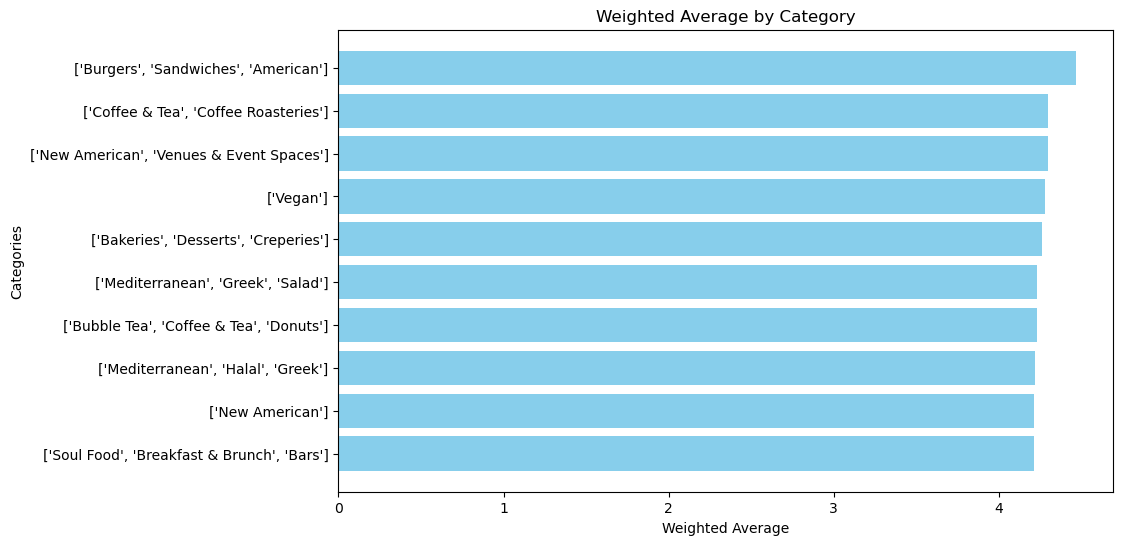

In [5]:
agg = {
    'rating': lambda x : x.mean(),
    'review_count' : lambda x : x.sum()
    
}
df = check.groupby('categories').agg(agg).sort_values('rating',ascending = False)
avg_num_reviews = int(df['review_count'].mean())
avg_review = round(df['rating'].mean(),2)

df = df.assign(avg_review_numbers = avg_num_reviews)
df = df.assign(avg_review = avg_review)

df['weighted_average'] = df.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)

df = df.sort_values('weighted_average', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(df['categories'].apply(lambda x: ''.join(x)), df['weighted_average'], color='skyblue')
plt.xlabel('Weighted Average')
plt.ylabel('Categories')
plt.title('Weighted Average by Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Images/Category_graph.jpg',bbox_inches='tight')
plt.show()



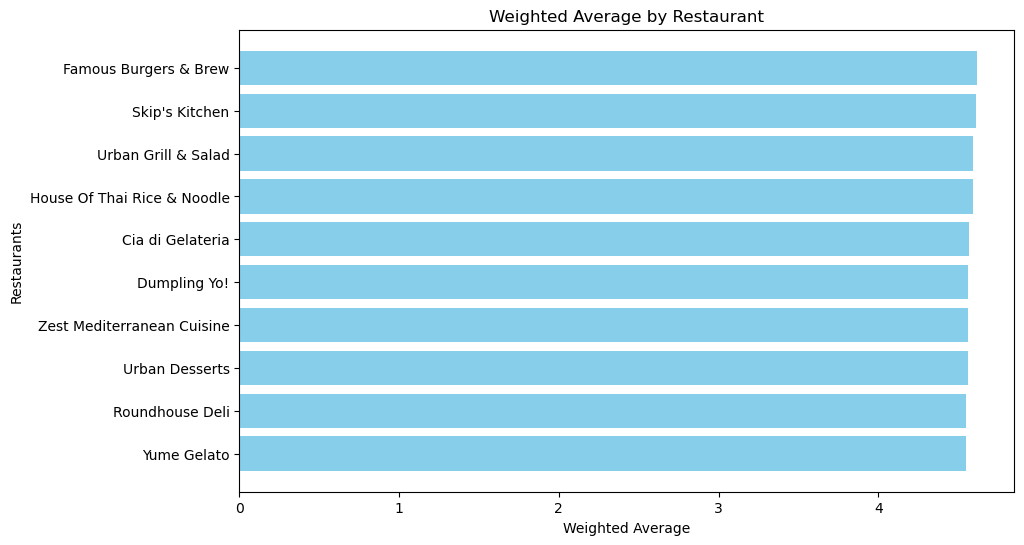

In [6]:
agg2 = {
    'rating' : lambda x : x.mean(),
    'review_count' : lambda x : x.sum(),
    'price' : 'first'
    
}
df2 = check.groupby('name_x').agg(agg2).sort_values('review_count', ascending=False)

avg_num_reviews2 = int(df['review_count'].mean())
avg_review2 = round(df['rating'].mean(),2)

df2 = df2.assign(avg_review_numbers = avg_num_reviews2)
df2 = df2.assign(avg_review = avg_review2)

df2['weighted_average'] = df2.apply(lambda row: round((row['avg_review']*row['avg_review_numbers'] + row['rating']*row['review_count'])/(row['avg_review_numbers']+row['review_count']),2),axis=1)

df2 = df2.sort_values('weighted_average', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(df2['name_x'], df2['weighted_average'], color='skyblue')
plt.xlabel('Weighted Average')
plt.ylabel('Restaurants')
plt.title('Weighted Average by Restaurant')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Images/restaurant_rating_graph.jpg', bbox_inches='tight')
plt.show()




In [88]:
#Get number of health codes happening at store
import ast
def count_elements_in_lists(lst):
    return sum(len(sub_lst) for sub_lst in lst)
def convert_to_list(string_list):
    return ast.literal_eval(string_list)

# Apply the function to the 'string_lists' column
check['date'] = check['date'].apply(convert_to_list)
check['num_health_code_violations'] = check['health codes'].apply(count_elements_in_lists)
check

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,"['Breakfast & Brunch', 'American', 'Southern']",38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[[7]],"[April 21, 2023]",https://inspections.myhealthdepartment.com/sac...,1
1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,"['Bars', 'American', 'Sandwiches']",38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[[1c, 6, 14a, 36, 41]]","[November 8, 2023]",https://inspections.myhealthdepartment.com/sac...,5
2,1000-ois,oishii-sushi-and-karaoke-bar-sacramento,Oishii Sushi & Karaoke Bar,2.8,$$,459,"['Japanese', 'Karaoke', 'Sushi Bars']",38.578810,-121.493760,"['1000 K St', 'Ste 200', 'Sacramento, CA 95814']",Sacramento,95814,1.916558e+10,"1000 K St Ste 200 Sacramento, CA 95814-3831","[[7, 14b, 27, 30a], [4, 6, 7, 14a, 26, 27, 30a...","[January 3, 2024, April 13, 2023]",https://inspections.myhealthdepartment.com/sac...,12
3,1000-the,the-boiling-crab-sacramento-4,The Boiling Crab,3.6,$$,727,"['Cajun/Creole', 'Seafood']",38.578797,-121.493964,"['1000 K St', 'Ste 100', 'Sacramento, CA 95814']",Sacramento,95814,1.916281e+10,"1000 K St Sacramento, CA 95814-3830","[[35, 36], [4, 35], [4, 35]]","[January 16, 2024, September 7, 2023, Septembe...",https://inspections.myhealthdepartment.com/sac...,6
4,1001-chi,chipotle-mexican-grill-folsom,Chipotle Mexican Grill,2.4,$,268,"['Mexican', 'Fast Food']",38.669456,-121.155625,"['1001 E Bidwell St', 'Ste 106', 'Folsom, CA 9...",Folsom,95630,1.916984e+10,"1001 E Bidwell St Ste 106 Folsom, CA 95630-5549","[[1c, 42], [1c]]","[January 31, 2024, September 13, 2023]",https://inspections.myhealthdepartment.com/sac...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,9766-mel,mel-dogs-cafe-elk-grove,Mel Dog's Cafe,4.1,$,211,"['Breakfast & Brunch', 'American']",38.403080,-121.353690,"['9766 Waterman Rd', 'Ste B', 'Elk Grove, CA 9...",Elk Grove,95624,1.916686e+10,"9766 Waterman Rd Ste B Elk Grove, CA 95624-9472",[[]],"[May 18, 2023]",https://inspections.myhealthdepartment.com/sac...,0
2292,9783-bri,briannas-mexican-restaurant-sacramento,Brianna's Mexican Restaurant,3.5,$,111,['Mexican'],38.562248,-121.332118,"['9783 Lincoln Village Dr', 'Sacramento, CA 95...",Sacramento,95827,1.916365e+10,"9783 Lincoln Village Dr Sacramento, CA 95827-...","[[1a, 4, 6, 14a, 23, 27, 30b, 33, 34, 35, 36, ...","[December 8, 2023]",https://inspections.myhealthdepartment.com/sac...,15
2293,9819-bro,brookside-restaurant-and-bar-sacramento-3,Brookside Restaurant & Bar,3.4,$$,165,"['New American', 'Bars', 'Karaoke']",38.575360,-121.328870,"['9819 Horn Rd', 'Sacramento, CA 95827']",Sacramento,95827,1.916361e+10,"9819 Horn Rd Sacramento, CA 95827-1947","[[14a, 23, 33, 34, 35, 40, 41, 45]]","[November 29, 2023]",https://inspections.myhealthdepartment.com/sac...,8
2294,9824-wat,waterman-brewing-company-elk-grove,Waterman Brewing Company,3.6,$$,106,['Breweries'],38.400617,-121.357284,"['9824 Dino Dr', 'Unit 150', 'Elk Grove, CA 95...",Elk Grove,95624,1.916714e+10,"9824 Dino Dr Ste 150 Elk Grove, CA 95624-1287","[[1b, 6, 29, 33, 34, 36, 39, 44b, 47c]]","[December 12, 2023]",https://inspections.myhealthdepartment.com/sac...,9


In [93]:
check.to_csv('Data/merged.csv')

,key,alias,name_x,rating,price,review_count,categories,lat,lon,display_address,city,zip_code,phone,address,health codes,date,url,num_health_code_violations
0,1000-cra,cracker-barrel-old-country-store-sacramento-2,Cracker Barrel Old Country Store,2.4,$$,1213,"['Breakfast & Brunch', 'American', 'Southern']",38.583935,-121.414518,"['1000 Howe Ave', 'Sacramento, CA 95825']",Sacramento,95825,1.916564e+10,"1000 Howe Ave Sacramento, CA 95825-3907",[[7]],"[April 21, 2023]",https://inspections.myhealthdepartment.com/sac...,1
1,1000-del,delta-bar-and-grill-sacramento,Delta Bar and Grill,3.2,$$,102,"['Bars', 'American', 'Sandwiches']",38.582643,-121.506647,"['1000 Front St', 'Sacramento, CA 95814']",Sacramento,95814,1.916441e+10,"1000 Front St Sacramento, CA 95814-3231","[[1c, 6, 14a, 36, 41]]","[November 8, 2023]",https://inspections.myhealthdepartment.com/sac...,5
2,1000-ois,oishii-sushi-and-karaoke-bar-sacramento,Oishii Sushi & Karaoke Bar,2.8,$$,459,"['Japanese', 'Karaoke', 'Sushi Bars']",38.578810,-121.493760,"['1000 K St', 'Ste 200', 'Sacramento, CA 95814']",Sacramento,95814,1.916558e+10,"1000 K St Ste 200 Sacramento, CA 95814-3831","[[7, 14b, 27, 30a], [4, 6, 7, 14a, 26, 27, 30a...","[January 3, 2024, April 13, 2023]",https://inspections.myhealthdepartment.com/sac...,12
3,1000-the,the-boiling-crab-sacramento-4,The Boiling Crab,3.6,$$,727,"['Cajun/Creole', 'Seafood']",38.578797,-121.493964,"['1000 K St', 'Ste 100', 'Sacramento, CA 95814']",Sacramento,95814,1.916281e+10,"1000 K St Sacramento, CA 95814-3830","[[35, 36], [4, 35], [4, 35]]","[January 16, 2024, September 7, 2023, Septembe...",https://inspections.myhealthdepartment.com/sac...,6
4,1001-chi,chipotle-mexican-grill-folsom,Chipotle Mexican Grill,2.4,$,268,"['Mexican', 'Fast Food']",38.669456,-121.155625,"['1001 E Bidwell St', 'Ste 106', 'Folsom, CA 9...",Folsom,95630,1.916984e+10,"1001 E Bidwell St Ste 106 Folsom, CA 95630-5549","[[1c, 42], [1c]]","[January 31, 2024, September 13, 2023]",https://inspections.myhealthdepartment.com/sac...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,9766-mel,mel-dogs-cafe-elk-grove,Mel Dog's Cafe,4.1,$,211,"['Breakfast & Brunch', 'American']",38.403080,-121.353690,"['9766 Waterman Rd', 'Ste B', 'Elk Grove, CA 9...",Elk Grove,95624,1.916686e+10,"9766 Waterman Rd Ste B Elk Grove, CA 95624-9472",[[]],"[May 18, 2023]",https://inspections.myhealthdepartment.com/sac...,0
2292,9783-bri,briannas-mexican-restaurant-sacramento,Brianna's Mexican Restaurant,3.5,$,111,['Mexican'],38.562248,-121.332118,"['9783 Lincoln Village Dr', 'Sacramento, CA 95...",Sacramento,95827,1.916365e+10,"9783 Lincoln Village Dr Sacramento, CA 95827-...","[[1a, 4, 6, 14a, 23, 27, 30b, 33, 34, 35, 36, ...","[December 8, 2023]",https://inspections.myhealthdepartment.com/sac...,15
2293,9819-bro,brookside-restaurant-and-bar-sacramento-3,Brookside Restaurant & Bar,3.4,$$,165,"['New American', 'Bars', 'Karaoke']",38.575360,-121.328870,"['9819 Horn Rd', 'Sacramento, CA 95827']",Sacramento,95827,1.916361e+10,"9819 Horn Rd Sacramento, CA 95827-1947","[[14a, 23, 33, 34, 35, 40, 41, 45]]","[November 29, 2023]",https://inspections.myhealthdepartment.com/sac...,8
2294,9824-wat,waterman-brewing-company-elk-grove,Waterman Brewing Company,3.6,$$,106,['Breweries'],38.400617,-121.357284,"['9824 Dino Dr', 'Unit 150', 'Elk Grove, CA 95...",Elk Grove,95624,1.916714e+10,"9824 Dino Dr Ste 150 Elk Grove, CA 95624-1287","[[1b, 6, 29, 33, 34, 36, 39, 44b, 47c]]","[December 12, 2023]",https://inspections.myhealthdepartment.com/sac...,9


In [115]:
import folium
from branca.colormap import LinearColormap

check_cp = check.copy()
check_cp = check[check.lat.notna() & check.lon.notna()]

m = folium.Map(location = [38.5816, -121.4944], zoom_start = 10)

color_map = LinearColormap(['red', 'yellow', 'green'], vmin=check_cp['rating'].min(), vmax=check_cp['rating'].max())

cols = ["name_x", "lat", "lon", "rating", "num_health_code_violations"]
for name, lat, lng, rating, health_code in check_cp[cols].itertuples(index = False):
    popup = folium.Popup(name, parse_html = True)
    circle = folium.Circle([float(lat), float(lng)], color=color_map(rating), fill_opacity=True, fill=True  , radius = health_code, popup = popup)
    m.add_child(circle)
fig = folium.Figure(width = 900, height = 400)
fig.add_child(m)
fig.save('Data/map.html')